In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

Get the data

In [3]:
data = loadmat('D:/ProgrammingBook/AndrewNg/ex5data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [89]:
xtrain, ytrain, xtest, ytest, xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape, xval.shape, yval.shape

((12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1))

Visualization

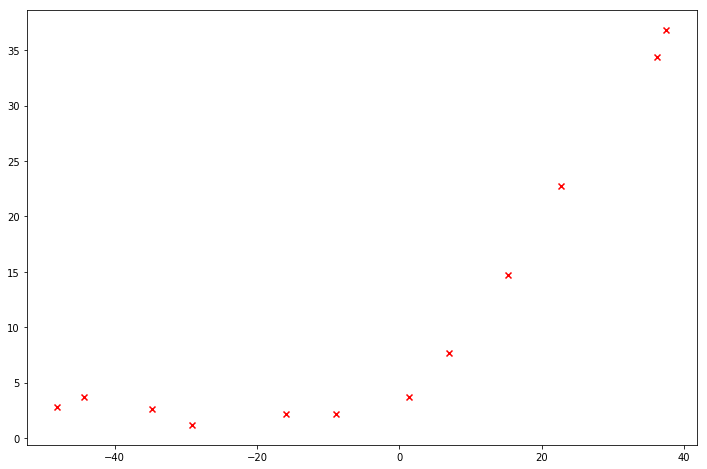

In [33]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(xtrain, ytrain, c = 'r', marker = 'x')
plt.show()

In [55]:
def cost(theta, x, y, lambda_):
    m = x.shape[0]
    theta = np.matrix(theta)
    #print(theta.shape)
    hypo = np.dot(x, theta.T)
    error = hypo - y
    J=0
    J = np.sum(np.power(error, 2))/(2*m)+lambda_*np.sum(np.power(theta[0,1:], 2))/(2*m)
    #print(theta.shape, x.shape, y.shape, lambda_)
    return J

In [90]:
theta = np.ones(2)
a = np.ones((xtrain.shape[0],1))
xtrain = np.c_[a, xtrain]

In [56]:
cost_= cost(theta, xtrain, ytrain, 1)
cost_ #变量和函数名不要重复

303.9931922202643

In [68]:
def gradient(theta, x, y, lambda_):
    m = x.shape[0]
    params = x.shape[1]
    theta = np.matrix(theta)
    hypo = np.dot(x, theta.T)
    error = hypo-y
    grad = []
    for i in range(params):
        temp = np.expand_dims(x[:,i], axis = 1)
        common_term = np.sum(np.multiply(error, temp))/m
        if(i==0):
            grad.append(common_term)
        else:
            regularized_term = lambda_*theta[0,i]/m
            grad.append(common_term+regularized_term)
    grad = np.array(grad)
    return grad


In [69]:
grad = gradient(theta, xtrain, ytrain, 1)
grad

array([-15.30301567, 598.25074417])

In [72]:
import scipy.optimize as opt
res = opt.fmin_tnc(func=cost, x0 = theta, fprime=gradient, args=(xtrain,ytrain, 1))
res

(array([13.08771447,  0.367742  ]), 9, 1)

In [73]:
cost(res[0], xtrain, ytrain, 1)

22.379541822940315

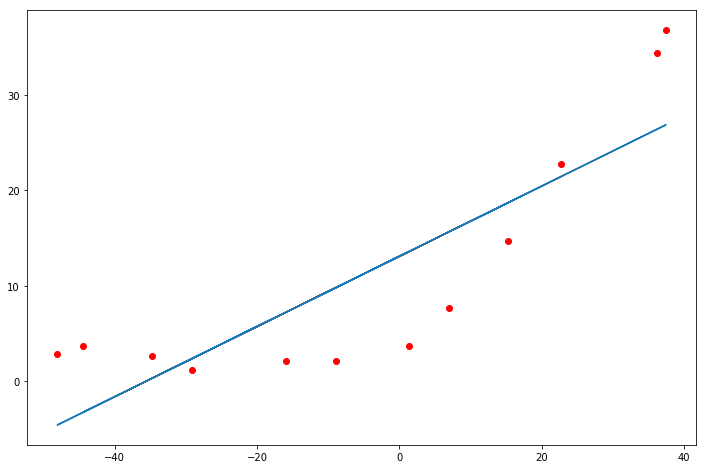

In [77]:
t = np.matrix(res[0])
y = np.dot(xtrain, t.T)
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(xtrain[:,1], ytrain, c = 'r', marker = 'o')
ax.plot(xtrain[:,1], y)
plt.show()

In [83]:
y.shape, theta

((12, 1), array([1., 1.]))

In [91]:
a = np.ones((xval.shape[0],1))
xval = np.c_[a, xval]
xval.shape

(21, 2)

In [99]:
i = 0
val_cost = []
train_cost = []
for i in range(1,xtrain.shape[0]+1):
    res = opt.fmin_tnc(func=cost, x0 = theta, args = (xtrain[:i,:], ytrain[:i,:], 1), fprime=gradient)
    train_cost.append(cost(res[0], xtrain[:i,:], ytrain[:i,:], 1))
    val_cost.append(cost(res[0], xval,yval, 1))


In [100]:
train_cost, val_cost

([7.251984225875489e-12,
  0.0013070021844454268,
  3.3350169674783947,
  2.881846874597248,
  13.174272951585467,
  19.461395509980644,
  20.11214877169486,
  18.184047027035877,
  22.618879930744058,
  23.26859779295757,
  24.323252617618287,
  22.379541822940315],
 [138.84841147443623,
  110.64774513667682,
  44.978913351204724,
  48.34641331733222,
  35.86334521913354,
  33.82763421641815,
  31.970093126963125,
  30.86287614342377,
  31.136900612460146,
  28.938571854122756,
  29.554192628745177,
  29.43639619942445])

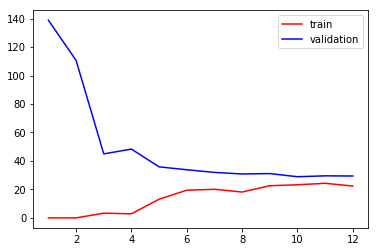

In [106]:
x_list = np.arange(1,13)
plt.plot(x_list, train_cost, c = 'r',label = 'train')
plt.plot(x_list, val_cost, c = 'b', label = 'validation')
plt.legend(loc = 1)
plt.show()

以上可以看出是欠拟合的情况，最后收敛的error还是很大的

In [108]:
xtrain.shape

(12, 2)

In [110]:
xtrain = np.insert(xtrain, 2, np.power(xtrain[:,1],2), axis = 1)
xtrain = np.insert(xtrain, 3, np.power(xtrain[:,1],3), axis = 1)
xtrain.shape

(12, 4)

In [120]:
xtrain[:,1] = (xtrain[:,1]-xtrain[:,1].mean())/xtrain[:,1].std()
xtrain[:,2] = (xtrain[:,2]-xtrain[:,2].mean())/xtrain[:,2].std()
xtrain[:,3] = (xtrain[:,3]-xtrain[:,3].mean())/xtrain[:,3].std()

In [121]:
theta = np.ones(xtrain.shape[1])
theta.shape

(4,)

In [122]:
res = opt.fmin_tnc(func=cost, x0 = theta, fprime=gradient, args=(xtrain,ytrain, 1))
res

(array([11.21758817,  8.86424682,  6.92878267,  3.97105638]), 19, 1)

In [123]:
cost(res[0], xtrain, ytrain,1)

7.4982777749219025